## Autor
Danilo César Tertuliano Melo - 221031149

Github: DaniloCTM

## Objetivo

Este artigo tem como objetivo apresentar o funcionamento de diferentes modelos de redes neurais. Para demonstrar essa diferença será utilizado um dataset com imagens de ratos e capivaras.

-----

## Passo 1 - Configurando o Ambiente

Nessa etapa baixamos as bibliotecas e os dados necessários para o treinamento

In [ ]:
!pip install duckduckgo_search

In [ ]:
from fastai.vision.all import *
from fastdownload import download_url


from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [11]:
# Baixando as imagens:
searches = 'capybara','rat'
path = Path('capybara_or_rat')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'capybara photo'
Searching for 'capybara sun photo'
Searching for 'capybara shade photo'
Searching for 'rat photo'
Searching for 'rat sun photo'
Searching for 'rat shade photo'


## Passo 2 - Verificando a integridade dos dados

Aqui verficamos se existe algum problema nas imagens baixadas

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

## Passo 3 - Treinando o Modelo

Nessa etapa realizamos a criação do DataBlock e o treinamento do modelo nas 3 resnets (18,32,50) e no modelo levit 192

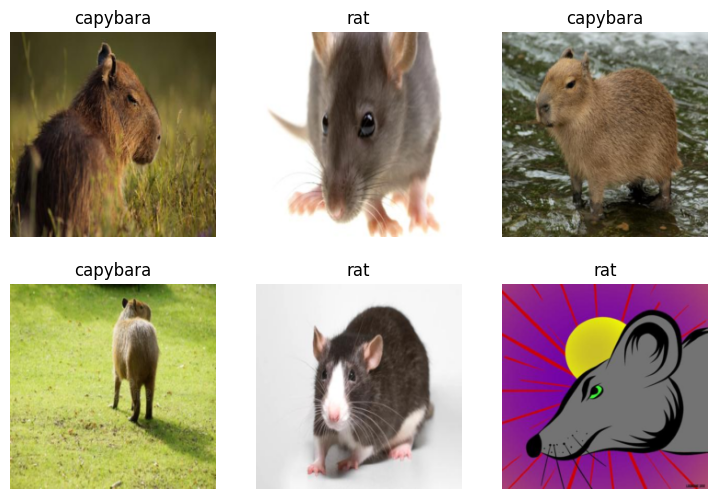

In [43]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Com o datablock definido, agora realizamos os treinamentos

### 3.1 Resnet50

In [ ]:
learnResnet50 = vision_learner(dls, resnet50, metrics = error_rate)

In [15]:
learnResnet50.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.526254,0.016601,0.000000,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.029396,0.290277,0.090909,00:28
1,0.016117,0.539784,0.121212,00:28
2,0.010484,0.406078,0.121212,00:27


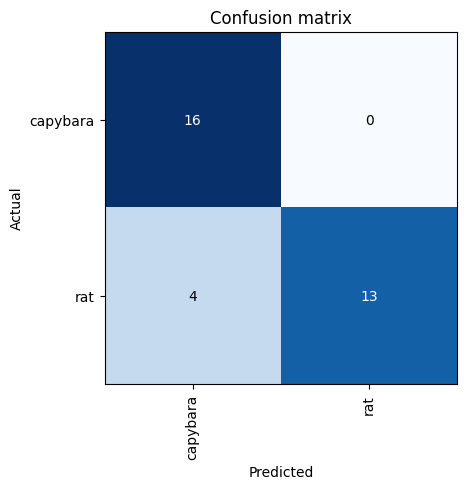

In [16]:
matriz = ClassificationInterpretation.from_learner(learnResnet50)
matriz.plot_confusion_matrix()

### 3.1 Resnet34

In [ ]:
learnResnet34 = vision_learner(dls, resnet34, metrics = error_rate)

In [18]:
learnResnet34.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.943434,0.084316,0.060606,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.172279,0.194982,0.090909,00:19
1,0.092433,0.243647,0.060606,00:19
2,0.066014,0.263050,0.060606,00:19


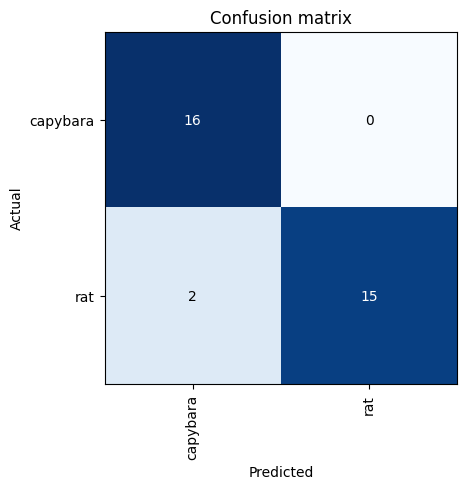

In [47]:
matriz = ClassificationInterpretation.from_learner(learnResnet34)
matriz.plot_confusion_matrix()

### 3.1 Resnet18

In [ ]:
learnResnet18 = vision_learner(dls, resnet18, metrics = error_rate)

In [21]:
learnResnet18.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.254856,0.831335,0.181818,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.195308,0.677372,0.151515,00:11
1,0.152677,0.684073,0.151515,00:11
2,0.099634,0.529963,0.151515,00:11


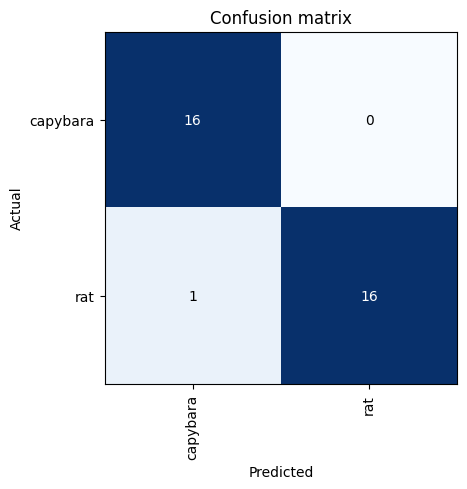

In [48]:
matriz = ClassificationInterpretation.from_learner(learnResnet18)
matriz.plot_confusion_matrix()

-----
Usando um modelo da biblioteca timm

In [ ]:
import timm

#lista com todos os modelos disponiveis na biblioteca
timm.list_models('*')

In [44]:
learnLevit = vision_learner(dls, "vit_small_patch16_224", metrics=error_rate)

In [45]:
learnLevit.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.149543,0.317353,0.121212,00:37
1,0.657435,0.051747,0.030303,00:41
2,0.458409,0.031225,0.000000,00:40


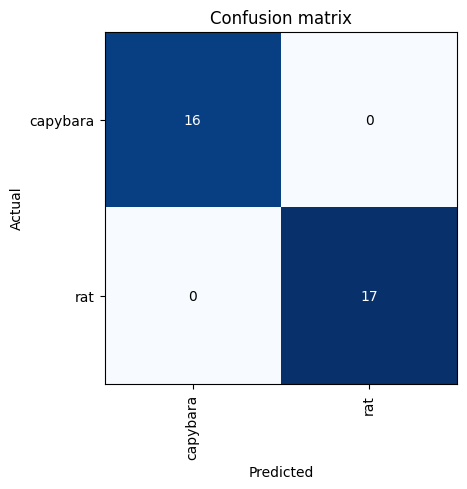

In [46]:
matriz = ClassificationInterpretation.from_learner(learnLevit)
matriz.plot_confusion_matrix()

## Passo 4 - Análisando os diferentes modelos



Com base nesses teste é possível perceber que a rede vit_small foi a que se saiu melhor considerando o error_rate. Já entre as redes da familia resnet a 34 foi a que se saiu melhor com um erro de 0.06.

|           | Time  | Erro_rate |
|-----------|-------|-----------|
| Resnet18  | 00:41 | 0.151515  |
| Resnet34  | 01:10 | 0.060606  |
| Resnet50  | 01:36 | 0.121212  |
| vit_small | 01:58 | 0         |

As redes podem se comportar de forma diferente para cada novo problema, por isso é interessante testar diferentes redes enquanto está criando o seu modelo.

## Passo 5 - Deploy do Modelo

Nessa etapa escolhemos o melhor modelo (vit_small) e fizemos o deploy dele na plataforma Hugging Face

In [49]:
learnLevit.export('model.pkl')

O melhor modelo pode ser encontrado [aqui](https://huggingface.co/spaces/DaniloTertu/Lesson-3).

# Conclusão

Nessa lição foi possivel desenvolver um conhecimento importante sobre os fundamentos teoricos das redes neurais. Além disso por meio dessa lição foi possível conhecer outros modelos de redes neurais além das resnets. 